In [64]:
import numpy as np
import matplotlib.pyplot as plt

def generate_33_symmetric_matrix(n):
    np.random.seed(103)
    random_matrices = np.random.rand(n, 3, 3)
    symmetric_matrices = 0.5 * (random_matrices + np.transpose(random_matrices, (0, 2, 1)))
    np.random.seed(103)
    diag_vals = np.random.uniform(low = 0.55, high = 0.9, size = 3)
    for i in range(n):
        np.fill_diagonal(symmetric_matrices[i], diag_vals)
    return symmetric_matrices

def rearrange_adjacency_matrix(adj, community_values):
    # Get indices of nodes for each community
    community_indices = [np.where(community_values == i)[0] for i in range(max(community_values) + 1)]

    # Rearrange adjacency matrix
    reordered_adj_matrix = np.zeros_like(adj)
    row_offset = 0
    col_offset = 0
    for i, indices_i in enumerate(community_indices):
        col_offset = 0
        for j, indices_j in enumerate(community_indices):
            reordered_adj_matrix[row_offset:row_offset+len(indices_i), col_offset:col_offset+len(indices_j)] = \
                adj[np.ix_(indices_i, indices_j)]
            col_offset += len(indices_j)
        row_offset += len(indices_i)

    return reordered_adj_matrix



def adj_mat_fun(initial_states, num_steps, num_nodes, symmetric_matrices, transition_matrix):
  # Initialize edge density list

    # Iterate over steps
    for step in range(num_steps):
        if step == 0:
            current_states = initial_states.copy()
            previous_states = current_states.copy()
        elif step < num_steps-1:
            previous_states = current_states.copy()

            for i in range(num_nodes):
                current_states[i] = np.random.choice([0, 1, 2], p=transition_matrix[previous_states[i]])
                
        if step == num_steps-1:
            previous_states = current_states.copy()

            # Compute beta_ql_t for all node pairs
            beta_ql_t = symmetric_matrices[step][previous_states[:, None], previous_states]

            # Generate edge time matrix
            edge_time = np.random.binomial(n=1, p=beta_ql_t)
            edge_time = np.maximum(edge_time, edge_time.T)

            np.fill_diagonal(edge_time, np.zeros(num_nodes))
            final_mat = rearrange_adjacency_matrix(edge_time, np.array(previous_states))
            

    return final_mat







In [59]:
num_steps = 4000
num_nodes = 3000
num_groups = 3

# Generate symmetric matrices


# Transition matrix
transition_matrix = np.array([[0.65, 0.2, 0.15], [0.2, 0.75, 0.05], [0.25, 0.2, 0.55]])

mat_solve = np.array([transition_matrix[:,0].tolist(),transition_matrix[:,1].tolist(), [1,1,1]]) - np.array([[1,0,0], [0,1,0],[0,0,0]])

stationary_dist = np.linalg.solve(mat_solve, np.array([0,0,1]))
print("Stationary Distribution:", stationary_dist)



Stationary Distribution: [0.37962963 0.44444444 0.17592593]


In [60]:
symmetric_matrices = generate_33_symmetric_matrix(num_steps)
initial_states = np.random.choice([0, 1, 2], size=num_nodes)
np.matmul(np.matmul(stationary_dist, symmetric_matrices[num_steps-1]), stationary_dist) 


0.4894217400195003

Edge Density: 0.4011225306326582


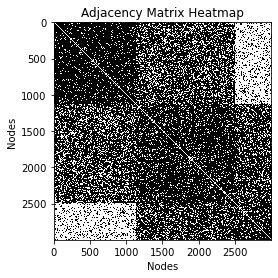

KeyboardInterrupt: 

In [61]:
for _ in range(5):
    symmetric_matrices = generate_33_symmetric_matrix(num_steps)
    #print("Last beta_ql_t:\n",symmetric_matrices[num_steps-1])
    initial_states = np.random.choice([0, 1, 2], size=num_nodes)
    adj_matrix = adj_mat_fun(initial_states, num_steps, num_nodes, symmetric_matrices, transition_matrix)
    print("Edge Density:", np.sum(adj_matrix)/(num_steps * (num_steps-1)))
    plt.imshow(adj_matrix, cmap='binary', interpolation='nearest')
    plt.title('Adjacency Matrix Heatmap')
    plt.xlabel('Nodes')
    plt.ylabel('Nodes')
    plt.show()

In [46]:
results_103 = np.load("D:/Rohan/Maths/MStat/Final Project/Dynamic Networks/Codes basic/Colab edge density data/pycharm_results.npy")
np.mean(results_103[:,num_steps-1])

0.8480121679197995

In [ ]:
if __name__ == '__main__':
    num_steps = 500
    num_nodes = 400
    num_groups = 3

    # Generate symmetric matrices
    symmetric_matrices = generate_33_symmetric_matrix(num_steps)

    # Transition matrix
    transition_matrix = np.array([[0.8, 0.05, 0.15], [0.2, 0.75, 0.05], [0.25, 0.2, 0.55]])

    # Initial states for each node
    np.random.seed(108)
    initial_states = np.random.choice([0, 1, 2], size=num_nodes)

    num_simulations = 8
    with mp.Pool(mp.cpu_count()) as pool:
        results = pool.starmap(adj_mat_fun,
                               [(initial_states, num_steps, num_nodes, symmetric_matrices, transition_matrix) for _ in
                                range(num_simulations)])


## Simulating the edge status

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def generate_33_symmetric_matrix(n):
    np.random.seed(103)
    random_matrices = np.random.rand(n, 3, 3)
    symmetric_matrices = 0.5 * (random_matrices + np.transpose(random_matrices, (0, 2, 1)))
    np.random.seed(103)
    diag_vals = np.random.uniform(low = 0.55, high = 0.9, size = 3)
    for i in range(n):
        np.fill_diagonal(symmetric_matrices[i], diag_vals)
    return symmetric_matrices


def y_1_y_2_edge_status(initial_states, num_steps, num_nodes, symmetric_matrices, transition_matrix):
  # Initialize edge density list
    edge_status = []
    # Iterate over steps
    for step in range(num_steps):
        
        if step == 0:
            current_states = initial_states.copy()
            previous_states = current_states.copy()
            edge_status.append(np.random.binomial(n=1, p=symmetric_matrices[step][previous_states[0], previous_states[1]]))
            for i in range(num_nodes):
                current_states[i] = np.random.choice([0, 1], p=transition_matrix[previous_states[i]])
            
        else:
            previous_states = current_states.copy()
            edge_status.append(np.random.binomial(n=1, p=symmetric_matrices[step][previous_states[0], previous_states[1]]))

            for i in range(num_nodes):
                current_states[i] = np.random.choice([0, 1], p=transition_matrix[previous_states[i]])

    return edge_status







In [5]:
num_steps = 3
num_nodes = 2
num_groups = 2


def generate_22_symmetric_matrix(n):
    np.random.seed(103)
    random_matrices = np.random.rand(n, 2, 2)
    symmetric_matrices = 0.5 * (random_matrices + np.transpose(random_matrices, (0, 2, 1)))
    np.random.seed(103)
    diag_vals = np.random.uniform(low = 0.55, high = 0.9, size = 3)
    for i in range(n):
        np.fill_diagonal(symmetric_matrices[i], diag_vals)
    return symmetric_matrices
# Generate symmetric matrices
symmetric_matrices = generate_22_symmetric_matrix(num_steps)

# Transition matrix
transition_matrix = np.array([[0.6, 0.4], [0.4, 0.6]])
initial_states = np.random.choice([0, 1], size=num_nodes)

    

In [192]:
all_statuses = []
num_simul = 999900
for _ in range(num_simul):
    all_statuses.append(y_1_y_2_edge_status(initial_states, num_steps, num_nodes, symmetric_matrices, transition_matrix))


all_statuses = np.array(all_statuses)

In [193]:
unique, counts = np.unique(all_statuses[:,0:2], return_counts=True, axis = 0)
print(unique)
counts/50000

[[0 0]
 [0 1]
 [1 0]
 [1 1]]


array([ 5.80588, 10.73132,  1.2155 ,  2.2453 ])

In [194]:
counts[3]/(np.unique(all_statuses[:,0], return_counts=True)[1][1])

0.6487806287563569

0.6492308554837708

In [170]:
np.unique(all_statuses[:,0], return_counts=True)

(array([0, 1]), array([823, 177], dtype=int64))

In [159]:
symmetric_matrices[1]

array([[0.70123892, 0.54038844, 0.47793597],
       [0.54038844, 0.61097534, 0.50446164],
       [0.47793597, 0.50446164, 0.60983029]])

In [6]:
def y_1_y_2_edge_status(initial_states, num_steps, num_nodes, symmetric_matrices, transition_matrix):
  # Initialize edge density list
    edge_status = []
    # Iterate over steps
    for step in range(num_steps):
        if step == 0:
            current_states = initial_states.copy()
            previous_states = current_states.copy()
            
            obtained_status = np.random.binomial(n=1, p=symmetric_matrices[step][previous_states[0], previous_states[1]])
            for i in range(num_nodes):
                current_states[i] = np.random.choice([0, 1], p=transition_matrix[previous_states[i]])
            edge_status.append(obtained_status)
        else:
            previous_states = current_states.copy()
            
            obtained_status = np.random.binomial(n=1, p=symmetric_matrices[step][previous_states[0], previous_states[1]])
            if step == num_steps-2:
                while obtained_status != 1:
                    obtained_status = np.random.binomial(n=1,
                                                         p=symmetric_matrices[step][previous_states[0], previous_states[1]])
            
            for i in range(num_nodes):
                current_states[i] = np.random.choice([0, 1], p=transition_matrix[previous_states[i]])
            edge_status.append(obtained_status)

    return edge_status



In [12]:
num_steps = 3
num_nodes = 2
num_groups = 2
all_statuses = []
num_simul = 1999900
for _ in range(num_simul):
    all_statuses.append(y_1_y_2_edge_status(initial_states, num_steps, num_nodes, symmetric_matrices, transition_matrix))


all_statuses = np.array(all_statuses)

print("simul:", np.unique(all_statuses[:,2], return_counts=True)[1][1]/num_simul)
print("theo:", np.sum(np.matmul(np.matmul(transition_matrix, np.matmul(np.matmul(transition_matrix, symmetric_matrices[2]), transition_matrix) * symmetric_matrices[1]), transition_matrix))/np.sum(np.matmul(np.matmul(transition_matrix,symmetric_matrices[1]), transition_matrix)))

simul: 0.47870343517175856
theo: 0.47948169768907695


array([[0.70123892, 0.64101925],
       [0.64101925, 0.61097534]])

In [208]:
np.matmul(np.matmul(transition_matrix, symmetric_matrices[1]), transition_matrix)

array([[0.65789131, 0.64826143],
       [0.64826143, 0.63983859]])

In [214]:
np.matmul(np.array([[1,2],[3,4]]), np.array([[0,0],[1,0]]))

array([[2, 0],
       [4, 0]])